# Lab 2: Data Cleaning with Python

In this lab, you will learn and gain hands-on experience on the use of Pandas for data cleaning.

Follow the instruction and run the code cells. Make sure you understand what happens in every stage. <br>

## Loading useful libraries for this lab.

In [1]:
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading in the data.

Data source: [Quinlan,R.. (1993). Auto MPG. UCI Machine Learning Repository. https://doi.org/10.24432/C5859H.](https://archive.ics.uci.edu/dataset/9/auto+mpg).

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/auto-mpg.data")
print(df.shape)
df.head()

(397, 1)


,"18.0 8 307.0 130.0 3504. 12.0 70 1\t""chevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11...
1,18.0 8 318.0 150.0 3436. 11...
2,16.0 8 304.0 150.0 3433. 12...
3,17.0 8 302.0 140.0 3449. 10...
4,15.0 8 429.0 198.0 4341. 10...


The `.shape` attribute shows that there are 397 rows and 1 column. Looking at the data output above, do you observe anything odd? Please share what you observe.

### Here are what I observed.


The output shows that Pandas is considering all the columns of the data as a single column. It can also be observed that the data do not have column names and what looks like first row in the data is being used as the column name.



### First attempt to solve the problem.

But first, let's look at the first 10 lines of the raw data.


In [3]:
response = requests.get("https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/auto-mpg.data")

n = 10
first_n_lines = []

i = 0
for line in response.iter_lines():
    first_n_lines.append(line.decode())

    i += 1
    if i >= n:
        break

first_n_lines

['18.0   8   307.0      130.0      3504.      12.0   70  1\t"chevrolet chevelle malibu"',
 '15.0   8   350.0      165.0      3693.      11.5   70  1\t"buick skylark 320"',
 '18.0   8   318.0      150.0      3436.      11.0   70  1\t"plymouth satellite"',
 '16.0   8   304.0      150.0      3433.      12.0   70  1\t"amc rebel sst"',
 '17.0   8   302.0      140.0      3449.      10.5   70  1\t"ford torino"',
 '15.0   8   429.0      198.0      4341.      10.0   70  1\t"ford galaxie 500"',
 '14.0   8   454.0      220.0      4354.       9.0   70  1\t"chevrolet impala"',
 '14.0   8   440.0      215.0      4312.       8.5   70  1\t"plymouth fury iii"',
 '14.0   8   455.0      225.0      4425.      10.0   70  1\t"pontiac catalina"',
 '15.0   8   390.0      190.0      3850.       8.5   70  1\t"amc ambassador dpl"']

Should we use tab characters as delimeter?

In [4]:
# using tabs (\t) as the delimeter
df = pd.read_csv("https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/auto-mpg.data", sep="\t")
print(df.shape)
df.head()

(397, 2)


,18.0 8 307.0 130.0 3504. 12.0 70 1,chevrolet chevelle malibu
0,15.0 8 350.0 165.0 3693. 11...,buick skylark 320
1,18.0 8 318.0 150.0 3436. 11...,plymouth satellite
2,16.0 8 304.0 150.0 3433. 12...,amc rebel sst
3,17.0 8 302.0 140.0 3449. 10...,ford torino
4,15.0 8 429.0 198.0 4341. 10...,ford galaxie 500


We now have two columns, but the first column clearly looks like it can be split further into more columns. What should we should have used as the delimeter?

We can use space character as the delimeter. Uncomment and run the code block below to see the output.

In [5]:
# df = pd.read_csv("https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/auto-mpg.data", sep="\s")
# print(df.shape)
# df.head()

Why was the error thrown? We have unequal number of space characters separating the columns.

Having a re-look at some lines of the data.

In [6]:
first_n_lines

['18.0   8   307.0      130.0      3504.      12.0   70  1\t"chevrolet chevelle malibu"',
 '15.0   8   350.0      165.0      3693.      11.5   70  1\t"buick skylark 320"',
 '18.0   8   318.0      150.0      3436.      11.0   70  1\t"plymouth satellite"',
 '16.0   8   304.0      150.0      3433.      12.0   70  1\t"amc rebel sst"',
 '17.0   8   302.0      140.0      3449.      10.5   70  1\t"ford torino"',
 '15.0   8   429.0      198.0      4341.      10.0   70  1\t"ford galaxie 500"',
 '14.0   8   454.0      220.0      4354.       9.0   70  1\t"chevrolet impala"',
 '14.0   8   440.0      215.0      4312.       8.5   70  1\t"plymouth fury iii"',
 '14.0   8   455.0      225.0      4425.      10.0   70  1\t"pontiac catalina"',
 '15.0   8   390.0      190.0      3850.       8.5   70  1\t"amc ambassador dpl"']

We clearly have data inconsistency issue here: the delimeter used in each line is not consistent. For example. we can see tab (\t) being used, and unequal number of spaces is also used. Consider the code cells below to confirm this.

In [7]:
# replacing space characters with "x" so as to spot the differences in the number of spaces separators
first_n_lines[0].replace(" ", "x")

'18.0xxx8xxx307.0xxxxxx130.0xxxxxx3504.xxxxxx12.0xxx70xx1\t"chevroletxchevellexmalibu"'

But pandas dataframes must be rectangular and cannot be ragged. How can we solve this problem? Regular Expression (regex) to the rescue! See the resources below to learn about them and how they are useful for matching patterns in strings.

https://developers.google.com/edu/python/regular-expressions

https://docs.python.org/3/howto/regex.html

https://realpython.com/regex-python/

In [8]:
# using '\s+' (matches 1 or more number of whitespace characters) as separator
df = pd.read_csv("https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/auto-mpg.data", sep="\s+")
print(df.shape)
df.head()

(397, 9)


,18.0,8,307.0,130.0,3504.,12.0,70,1,chevrolet chevelle malibu
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500


From the first 5 rows above, we can see that pandas is using the first row as the header (column names). We have to solve this by setting the column names. Read the documentation for pandas read_csv function by running `pd.read_csv?` to get familar with the parameters of the function.

In [9]:
# setting the column names
col_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]

df = pd.read_csv("https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/auto-mpg.data", sep="\s+", names=col_names)
print(df.shape)
df.head()

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Identifying Wrong Data Type and Corrupted Values

Checking the percentage of Nan values per column

In [10]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Looks like there are no missing values in the data. Next, we check the data type of each column.

In [11]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

Something seems odd. `horsepower` column has a data type of `object`, whereas the values are numbers and the meta data indicates that has continuous values. What could be the problem?

To determine what the problem is, let's check the unique values in `horsepower` column.

In [12]:
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

Those are alot of numbers to look through. One way to quickly check for any inconsistency in the data, is to sort it.

In [13]:
np.sort(df['horsepower'].unique())

array(['100.0', '102.0', '103.0', '105.0', '107.0', '108.0', '110.0',
       '112.0', '113.0', '115.0', '116.0', '120.0', '122.0', '125.0',
       '129.0', '130.0', '132.0', '133.0', '135.0', '137.0', '138.0',
       '139.0', '140.0', '142.0', '145.0', '148.0', '149.0', '150.0',
       '152.0', '153.0', '155.0', '158.0', '160.0', '165.0', '167.0',
       '170.0', '175.0', '180.0', '190.0', '193.0', '198.0', '200.0',
       '208.0', '210.0', '215.0', '220.0', '225.0', '230.0', '46.00',
       '48.00', '49.00', '52.00', '53.00', '54.00', '58.00', '60.00',
       '61.00', '62.00', '63.00', '64.00', '65.00', '66.00', '67.00',
       '68.00', '69.00', '70.00', '71.00', '72.00', '74.00', '75.00',
       '76.00', '77.00', '78.00', '79.00', '80.00', '81.00', '82.00',
       '83.00', '84.00', '85.00', '86.00', '87.00', '88.00', '89.00',
       '90.00', '91.00', '92.00', '93.00', '94.00', '95.00', '96.00',
       '97.00', '98.00', '?'], dtype=object)

Now, we can easily see the presence of a `'?'` in the `horsepower` column. How should we deal with them? The first step in dealing with them is to understand WHY they are in the data. Luckily for us, we have a meta data for the dataset(sometimes we may not be lucky to have one).

## Checking the metadata

In [14]:
response = requests.get("https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/auto-mpg.names")

meta_data = response.text

print(meta_data)

1. Title: Auto-Mpg Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University. The dataset was 
                used in the 1983 American Statistical Association Exposition.
   (c) Date: July 7, 1993

3. Past Usage:
    -  See 2b (above)
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   This dataset is a slightly modified version of the dataset provided in
   the StatLib library.  In line with the use by Ross Quinlan (1993) in
   predicting the attribute "mpg", 8 of the original instances were removed 
   because they had unknown values for the "mpg" attribute.  The original 
   dataset is available in the file "auto-mpg.data-original".

   "The data concerns city-cycle fuel consumptio

Section 8 of the meta data tells us that `horsepower` has 6 missing values. Do the question marks indicate missing values? One way to check is to count the number of rows with a `?` in the `horsepower` column.

## Handling Corrupted Values

In [15]:
df[df["horsepower"].str.contains("\?")].shape[0] # we had to escape '?' because it is a metacharacter in python regex

6

In [16]:
# viewing the subset of the data that has a '?' in the 'horsepower' column
df[df["horsepower"].str.contains("\?")]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


Since `df.isnull().sum()` showed that there are no missing values in the data, and since the metadata tells us that the `horsepower` column has 6 missing values, we can *assume* that the `?`s are placeholders for missing values. Thus, we correctly format them as null values.

In [17]:
df.loc[df['horsepower'].str.contains("\?"), 'horsepower'] = np.nan

df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

## Handling Wrong Data Type

Now, we see that we now have 6 missing values in the `horsepower` column. We will now re-check the data types of the columns.

In [18]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

The values of `horsepower` column are still stored as object. Let's check the first five rows to see how they look like.

In [19]:
df['horsepower'].head()

0    130.0
1    165.0
2    150.0
3    150.0
4    140.0
Name: horsepower, dtype: object

Again, they appear to be numbers stored as `object` data type. Let's now check the data type of each values to ascertain how pandas is storing them.

In [20]:
df['horsepower'].apply(lambda x: type(x))

0      <class 'str'>
1      <class 'str'>
2      <class 'str'>
3      <class 'str'>
4      <class 'str'>
           ...      
393    <class 'str'>
394    <class 'str'>
395    <class 'str'>
396    <class 'str'>
397    <class 'str'>
Name: horsepower, Length: 398, dtype: object

We see that each of the values is stored as string. We can output a single value in the column to confirm this.

In [21]:
df['horsepower'].iloc[0]

'130.0'

We see the quotation mark around the number. Note that `'130.0'` is not the same as `130.0` as the latter is stored as float, while the former as string. We will now convert the data type of `horsepower` column to float.

In [22]:
df['horsepower'] = df['horsepower'].astype(float)

df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

Re-checking the number of missing values in the columns

In [23]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Section 7 of the metadata shows that `cylinder`, `model year` and `origin` columns are discrete data types. Let's check the unique values in these columns

In [24]:
print(f"Unique values in 'cylinder' column are: {df['cylinders'].unique()}")
print(f"Unique values in 'model year' column are: {df['model year'].unique()}")
print(f"Unique values in 'origin' column are: {df['origin'].unique()}")

Unique values in 'cylinder' column are: [8 4 6 3 5]
Unique values in 'model year' column are: [70 71 72 73 74 75 76 77 78 79 80 81 82]
Unique values in 'origin' column are: [1 3 2]


Re-writing the `model year` column as 4 digits (YYYY).

In [25]:
df['model year'] = df['model year'].apply(lambda x: "19"+str(x))
df['model year'].unique()

array(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982'], dtype=object)

What does the values of the `origin` column represent? If we check the [data description](https://lib.stat.cmu.edu/datasets/cars.desc) provided by CMU StatLib, we were told that:

>*... 8 variables: MPG (miles per gallon), # cylinders, engine displacement (cu. inches), horsepower, vehicle weight (lbs.), time to accelerate from O to 60 mph (sec.), model year (modulo 100), and origin of car (1. American, 2. European, 3. Japanese)*

We can see that the values of the `origin` column are encoded. We will replace the values of the `origin` column with their (original) values. Note that sometimes (especially with machine learning models) we are better off endcoding discrete values. However, to make the results of our exploratory data analysis more readable, we may want to use the orignal values of encoded values.


Replacing values in `origin` with their original values.

In [26]:
df['origin'] = df['origin'].apply(lambda x: {1: "American", 2: "European", 3: "Japanese"}[x])
df['origin'].unique()

array(['American', 'Japanese', 'European'], dtype=object)

Finally, we will convert the data type of `cylinders` column to string.

In [27]:
df['cylinders'] = df['cylinders'].astype(str)

Finally, check on the data type of the columns of the dataframe



In [28]:
df.dtypes

mpg             float64
cylinders        object
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year       object
origin           object
car name         object
dtype: object

Re-checking the first five rows to recall the look of the data


In [29]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,1970,American,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,1970,American,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,1970,American,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,1970,American,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,1970,American,ford torino


## Summary Statistics

Some summary statistics of the numeric columns.

In [30]:
df.describe()

,mpg,displacement,horsepower,weight,acceleration
count,398.000000,398.000000,392.000000,398.000000,398.000000
mean,23.514573,193.425879,104.469388,2970.424623,15.568090
std,7.815984,104.269838,38.491160,846.841774,2.757689
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.500000,104.250000,75.000000,2223.750000,13.825000
50%,23.000000,148.500000,93.500000,2803.500000,15.500000
75%,29.000000,262.000000,126.000000,3608.000000,17.175000
max,46.600000,455.000000,230.000000,5140.000000,24.800000


### Histogram Plot for Continuous Values

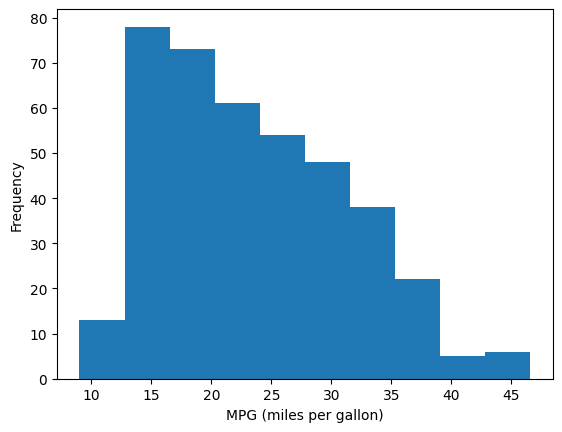

In [31]:
plt.hist(df['mpg'])
plt.xlabel('MPG (miles per gallon)')
plt.ylabel('Frequency')
plt.show()

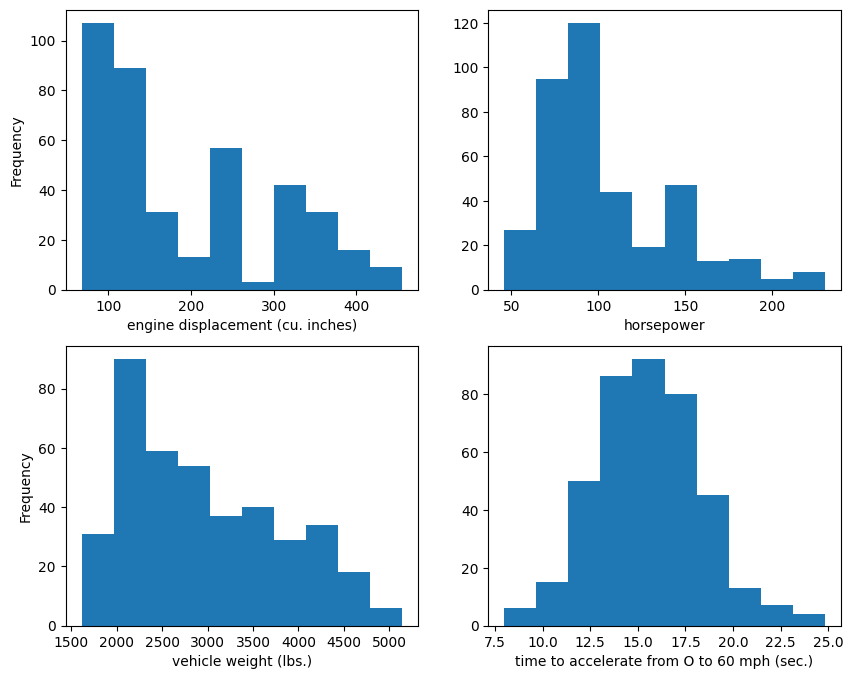

In [32]:
fig = plt.figure(figsize=(10, 8))
cols_to_plot = ("displacement", "horsepower", "weight", "acceleration")
descriptive_column_names = ("engine displacement (cu. inches)", "horsepower", "vehicle weight (lbs.)", "time to accelerate from O to 60 mph (sec.)")

for i in range(len(cols_to_plot)):
    ax = fig.add_subplot(2, 2, i+1)
    plt.hist(df[cols_to_plot[i]])
    plt.xlabel(descriptive_column_names[i])
    if i % 2 == 0:
        plt.ylabel("Frequency")
plt.show()

### Barplot for Discrete Variables

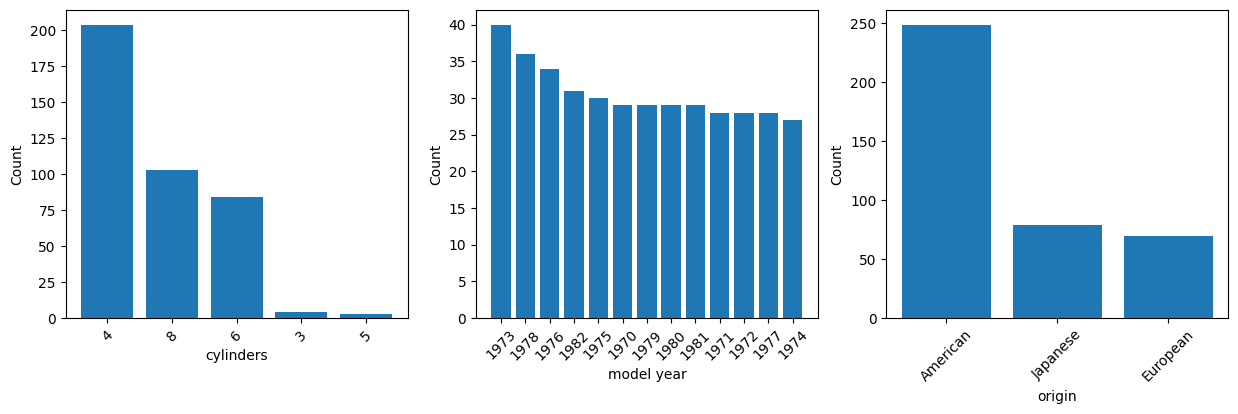

In [33]:
discrete_vars = ("cylinders", "model year", "origin")

fig = plt.figure(figsize=(15, 4))
for i in range(len(discrete_vars)):
    ax = fig.add_subplot(1, len(discrete_vars), i+1)
    count_per_category = df[discrete_vars[i]].value_counts()
    plt.bar(count_per_category.index, count_per_category.values)
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.xlabel(discrete_vars[i])

plt.show()

## Data Transformation

### Centering Data (subtracting the mean)

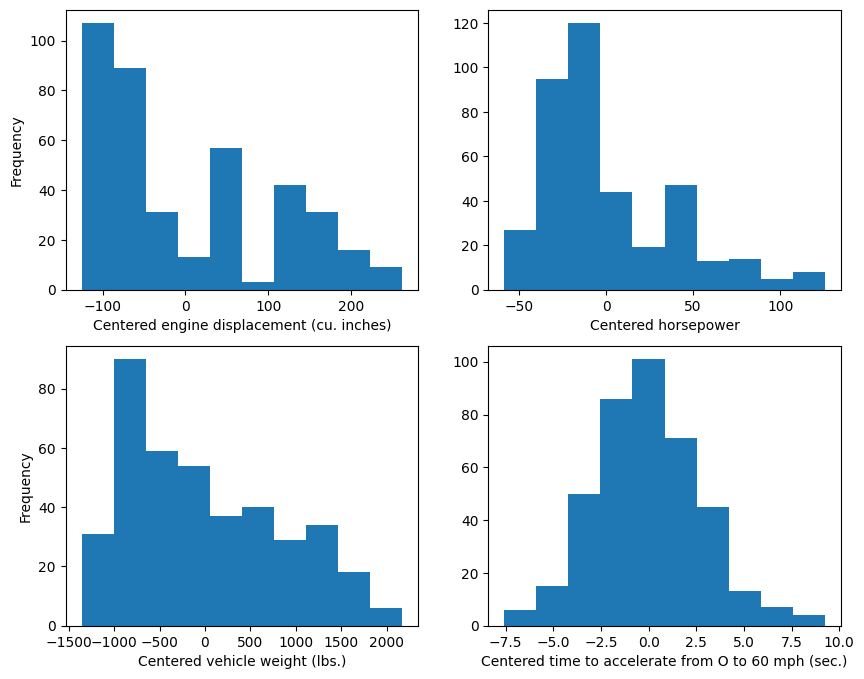

In [34]:
fig = plt.figure(figsize=(10, 8))
for i in range(len(cols_to_plot)):
    ax = fig.add_subplot(2, 2, i+1)
    plt.hist(df[cols_to_plot[i]] - df[cols_to_plot[i]].mean())
    plt.xlabel(f"Centered {descriptive_column_names[i]}")
    if i % 2 == 0:
        plt.ylabel("Frequency")
plt.show()

### MinMax Scaling

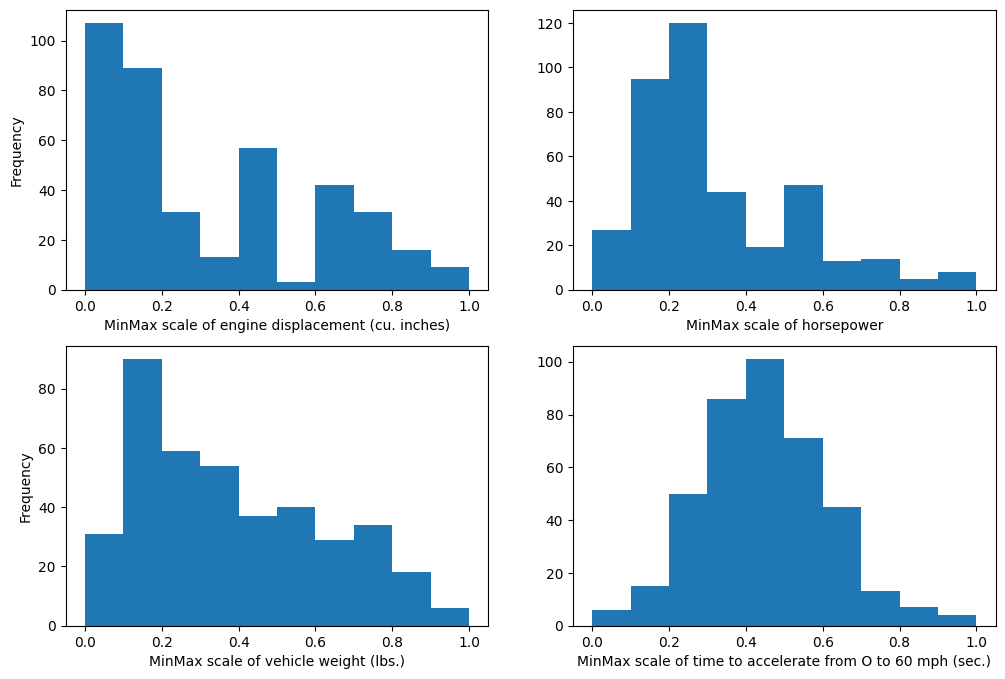

In [35]:
fig = plt.figure(figsize=(12, 8))
for i in range(len(cols_to_plot)):
    ax = fig.add_subplot(2, 2, i+1)
    plt.hist((df[cols_to_plot[i]] - df[cols_to_plot[i]].min()) / (df[cols_to_plot[i]].max() - df[cols_to_plot[i]].min()))
    plt.xlabel(f"MinMax scale of {descriptive_column_names[i]}")
    if i % 2 == 0:
        plt.ylabel("Frequency")
plt.show()

### Z-score

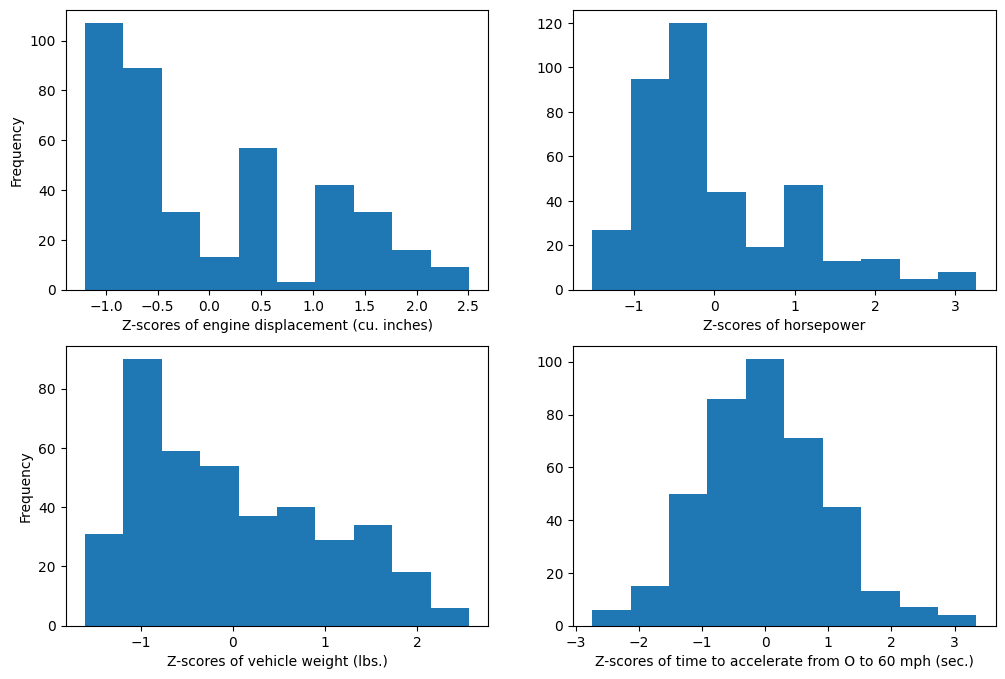

In [36]:
fig = plt.figure(figsize=(12, 8))
for i in range(len(cols_to_plot)):
    ax = fig.add_subplot(2, 2, i+1)
    plt.hist((df[cols_to_plot[i]] - df[cols_to_plot[i]].mean()) / df[cols_to_plot[i]].std())
    plt.xlabel(f"Z-scores of {descriptive_column_names[i]}")
    if i % 2 == 0:
        plt.ylabel("Frequency")
plt.show()

### Log Transform

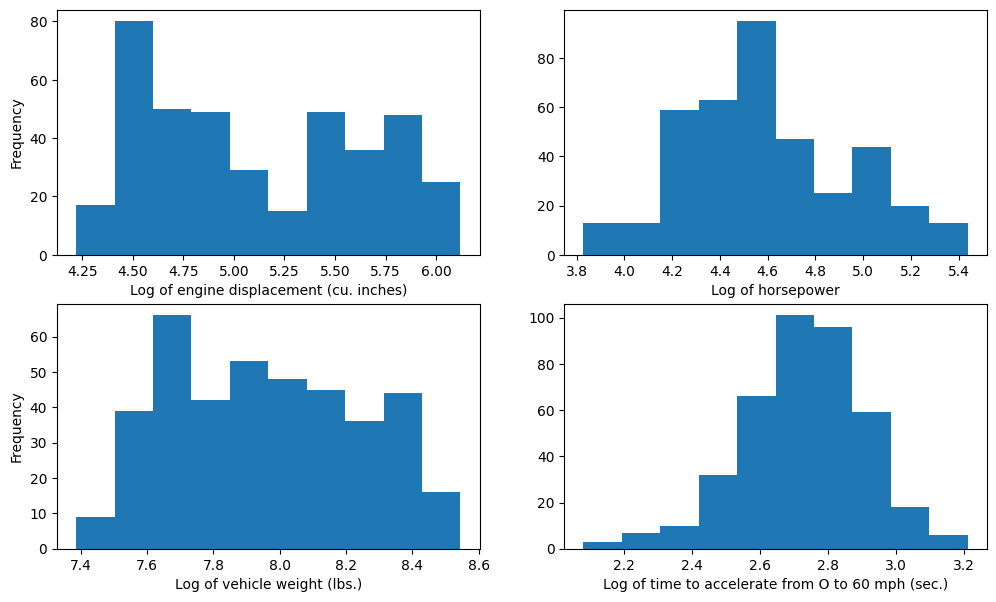

In [37]:
fig = plt.figure(figsize=(12, 7))
for i in range(len(cols_to_plot)):
    ax = fig.add_subplot(2, 2, i+1)
    plt.hist(np.log(df[cols_to_plot[i]]))
    plt.xlabel(f"Log of {descriptive_column_names[i]}")
    if i % 2 == 0:
        plt.ylabel("Frequency")
plt.show()

### Derived Feature

Let's consider the `car name` column.

In [38]:
# checking the number of unique values
df['car name'].unique().shape[0]

305

As seen in the output above, we have many unique values in the `car name` column. This will make it diffcult to visualize all the car names at once. Let's have a quick view of some of these values.

In [39]:
# sampling 20 unique values
df['car name'].unique()[:20]

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan'], dtype=object)

Sometimes, we can easily identify some inconsistences by sorting the values.

In [40]:
# first 50 car names after sorting
np.sort(df['car name'].unique())[:50]

array(['amc ambassador brougham', 'amc ambassador dpl',
       'amc ambassador sst', 'amc concord', 'amc concord d/l',
       'amc concord dl', 'amc concord dl 6', 'amc gremlin', 'amc hornet',
       'amc hornet sportabout (sw)', 'amc matador', 'amc matador (sw)',
       'amc pacer', 'amc pacer d/l', 'amc rebel sst', 'amc spirit dl',
       'audi 100 ls', 'audi 100ls', 'audi 4000', 'audi 5000',
       'audi 5000s (diesel)', 'audi fox', 'bmw 2002', 'bmw 320i',
       'buick century', 'buick century 350', 'buick century limited',
       'buick century luxus (sw)', 'buick century special',
       'buick electra 225 custom', 'buick estate wagon (sw)',
       'buick lesabre custom', 'buick opel isuzu deluxe',
       'buick regal sport coupe (turbo)', 'buick skyhawk',
       'buick skylark', 'buick skylark 320', 'buick skylark limited',
       'cadillac eldorado', 'cadillac seville', 'capri ii',
       'chevroelt chevelle malibu', 'chevrolet bel air',
       'chevrolet camaro', 'chevrolet ca

In [41]:
# last 50 car names after sorting
np.sort(df['car name'].unique())[-50:]

array(['renault 18i', 'renault 5 gtl', 'renault lecar deluxe', 'saab 99e',
       'saab 99gle', 'saab 99le', 'subaru', 'subaru dl', 'toyota carina',
       'toyota celica gt', 'toyota celica gt liftback', 'toyota corolla',
       'toyota corolla 1200', 'toyota corolla 1600 (sw)',
       'toyota corolla liftback', 'toyota corolla tercel',
       'toyota corona', 'toyota corona hardtop', 'toyota corona liftback',
       'toyota corona mark ii', 'toyota cressida', 'toyota mark ii',
       'toyota starlet', 'toyota tercel', 'toyouta corona mark ii (sw)',
       'triumph tr7 coupe', 'vokswagen rabbit',
       'volkswagen 1131 deluxe sedan', 'volkswagen 411 (sw)',
       'volkswagen dasher', 'volkswagen jetta', 'volkswagen model 111',
       'volkswagen rabbit', 'volkswagen rabbit custom',
       'volkswagen rabbit custom diesel', 'volkswagen rabbit l',
       'volkswagen scirocco', 'volkswagen super beetle',
       'volkswagen type 3', 'volvo 144ea', 'volvo 145e (sw)',
       'volvo 244dl',

We can derive more features from one or more existing features. For example, we can get a car's company name from its names. To do this, first let's check the unique values in the `car name` column.

As seen above, there are some inconsistences in the car names. E.g chevrolet misspelt as chevroelt, toyota  as toyouta , volkswagen  as  vokswagen  etc. With this in mind, let's first *assume* that company name is the first word in the car name.

Checking the unique company names.

In [42]:
np.sort(df['car name'].apply(lambda x: x.strip().split()[0]).unique())

array(['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevroelt',
       'chevrolet', 'chevy', 'chrysler', 'datsun', 'dodge', 'fiat',
       'ford', 'hi', 'honda', 'maxda', 'mazda', 'mercedes',
       'mercedes-benz', 'mercury', 'nissan', 'oldsmobile', 'opel',
       'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru',
       'toyota', 'toyouta', 'triumph', 'vokswagen', 'volkswagen', 'volvo',
       'vw'], dtype=object)

Does all the values make sense? What does 'hi' mean. To answer this let's check the car names where the first word is 'hi'.

In [43]:
# car names with 'hi' as the first word
df['car name'][df['car name'].apply(lambda x: x.strip().split()[0]) == 'hi']

28    hi 1200d
Name: car name, dtype: object

Domain knowledge is very important in analyzing data as it makes it possible for one to understand the concepts and meaning of some values in a data. A quick online search for the car named 'hi 1200d' (e.g. [this blog by The Truth About Cars](https://www.thetruthaboutcars.com/2021/02/rare-rides-the-1970-international-harvester-1200-d-a-pristine-pickup/) and [Wikipedia](https://en.wikipedia.org/wiki/International_Harvester)) shows that it is car in the 70's and was manufactured by International Harvester Company. Now that we know that 'hi' makes sense, we will not drop it from the data but instead, rename it to 'ihc' which is short for International Harvesters Company.

Additionally, some car names appears to be abbreviated on some occasions e.g. volkswagen being abbreviated as vw. Others seems to be the brand name and not company name. Domain knowledge is important! We will replace the company names as follows:

In [44]:
car_company_mapper = {
    "capri": "ford", # capri cars were manufactured by ford
    "chevroelt": "chevrolet", # misspelling
    "chevy": "chevrolet",  # misspelling
    "maxda": "mazda",  # misspelling
    "mercedes": "mercedes-benz", # alternate spelling
    "mercury": "ford", # mercury cars were manifactured by ford
    "nissan": "datsun", # nissan cars are manufactured by datsun
    "toyouta": "toyota", # misspelling
    "vokswagen": "volkswagen", # misspelling
    "vw": "volkswagen" # abbreviation
    }

Creating the `car company` column by using the first word in the car name, and cleaning up misspellings, abbreviations and other inconsistences.

In [45]:
df['car company'] = df['car name'].apply(lambda x: x.strip().split()[0])

df['car company'] = df['car company'].apply(lambda x: car_company_mapper.get(x, x))

np.sort(df['car company'].unique())

array(['amc', 'audi', 'bmw', 'buick', 'cadillac', 'chevrolet', 'chrysler',
       'datsun', 'dodge', 'fiat', 'ford', 'hi', 'honda', 'mazda',
       'mercedes-benz', 'oldsmobile', 'opel', 'peugeot', 'plymouth',
       'pontiac', 'renault', 'saab', 'subaru', 'toyota', 'triumph',
       'volkswagen', 'volvo'], dtype=object)

In [46]:
# number of unique car companies
df['car company'].unique().size

27

We have been able to create a feature named `car company` which has 27 unique discrete values from `car names` which has 305 unique discrete values.

Let's now visualize a bar plot of the car company showing their frequency in the data.

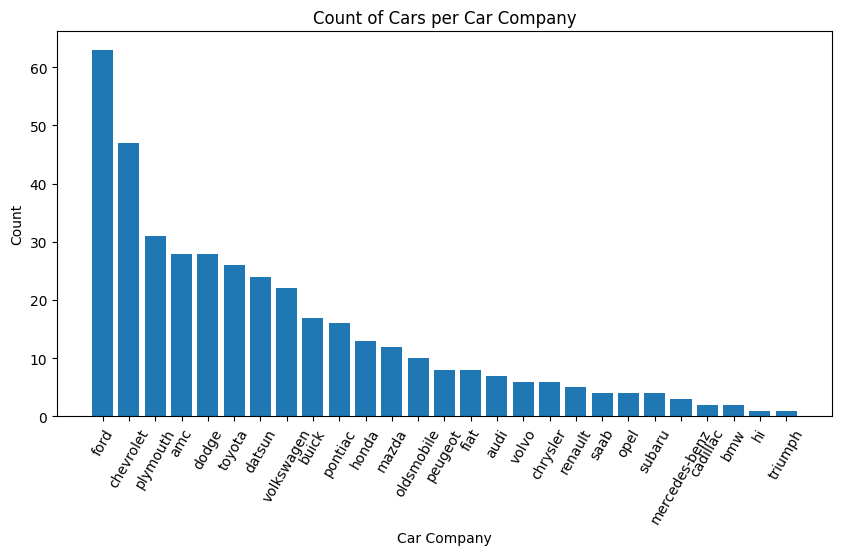

In [47]:
fig = plt.figure(figsize=(10, 5))
car_company_val_counts = df['car company'].value_counts()
plt.bar(car_company_val_counts.index, car_company_val_counts.values)
plt.xticks(rotation=60)
plt.xlabel("Car Company")
plt.ylabel("Count")
plt.title("Count of Cars per Car Company")
plt.show()

Sometimes, reporting percentage count is desirable as it makes it makes it easy to see the share of values of a variable.

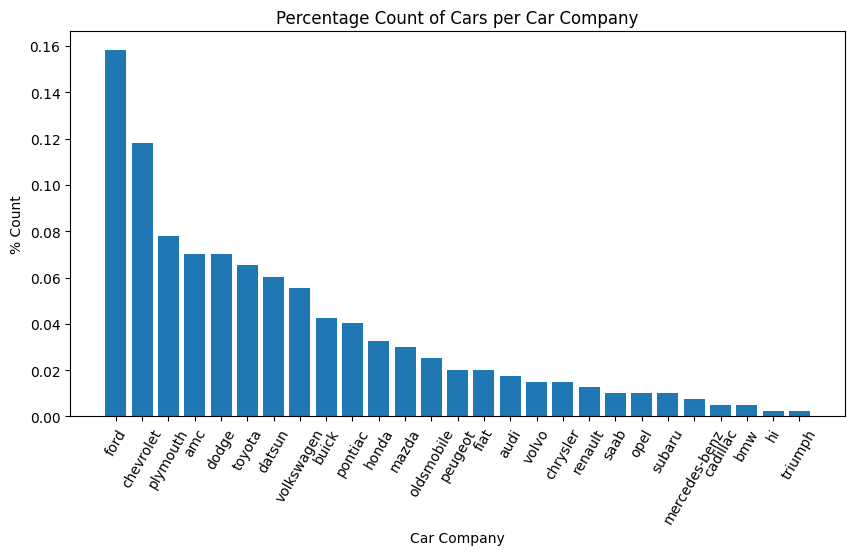

In [48]:
fig = plt.figure(figsize=(10, 5))
plt.bar(car_company_val_counts.index, car_company_val_counts.values / car_company_val_counts.sum())
plt.xticks(rotation=60)
plt.xlabel("Car Company")
plt.ylabel("% Count")
plt.title("Percentage Count of Cars per Car Company")
plt.show()

## Handling Missing Values

In [49]:
# checking for missing values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
car company     0
dtype: int64

Again, 6 missing values in a data with 1000 values is not same as having 6 missing values in a data with 10 values.  It is therefore worth showing the number of missing values as percentage of the number of values in the data.

In [50]:
# missing values per column as a fraction of the size of the data.
df.isnull().sum() / df.isnull().shape[0]

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      0.015075
weight          0.000000
acceleration    0.000000
model year      0.000000
origin          0.000000
car name        0.000000
car company     0.000000
dtype: float64

As seen above, we have about 1.5% missing values in `horsepower` column. The metadata did not tell us why these values are missing. We may want to check the data to see if there are some hints as to why they are missing.

Viewing rows with missing values in the `horsepower` column

In [51]:
df[df['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,car company
32,25.0,4,98.0,NaN,2046.0,19.0,1971,American,ford pinto,ford
126,21.0,6,200.0,NaN,2875.0,17.0,1974,American,ford maverick,ford
330,40.9,4,85.0,NaN,1835.0,17.3,1980,European,renault lecar deluxe,renault
336,23.6,4,140.0,NaN,2905.0,14.3,1980,American,ford mustang cobra,ford
354,34.5,4,100.0,NaN,2320.0,15.8,1981,European,renault 18i,renault
374,23.0,4,151.0,NaN,3035.0,20.5,1982,American,amc concord dl,amc


Again, we cannot see any obvious relationship between the missing values in `horsepower` column and other columns. We can assume that they are Missing Completely at Random (MCAR), and therefore impute them. First, let's check the distribution of `horsepower` column before imputing them.

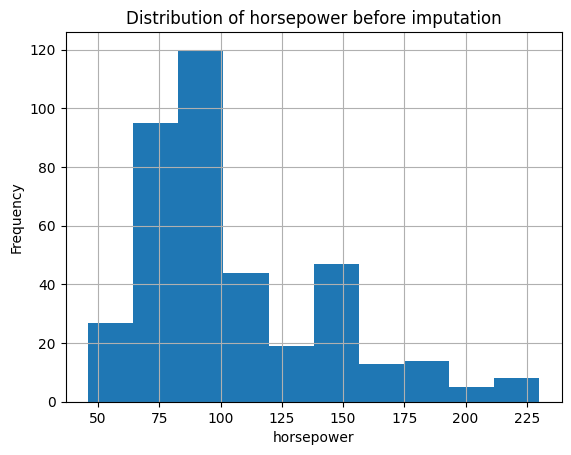

In [52]:
df['horsepower'].hist()
plt.xlabel("horsepower")
plt.ylabel("Frequency")
plt.title("Distribution of horsepower before imputation")
plt.show()

From the histogram plot above, we can that the distribution is slghtly skewed to the right due to the presence of *some* outliers.

In [53]:
# checking some summary statistics
df['horsepower'].describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

As seen above, the median is slightly different from the mean. But scale matters. How large is 1 horsepower? Since the distribution is skewed, so we will impute with median since it is relatively robust to outlier.

### Unconditional Imputation

In [54]:
# imputing with median unconditionally

# making a copy of df to demonstrate unconditional imputation. We will still need df for conditional imputation
df_copy = df.copy()

print(f"Before imputation, horsepower has: {df_copy['horsepower'].isnull().sum()}")
print("\n")

median_horsepower = df_copy['horsepower'].median() # calculating the median
df_copy['horsepower'].fillna(median_horsepower, inplace=True) # replacing missing values

df_copy.isnull().sum() # checking for missing values to confirm their replacement

Before imputation, horsepower has: 6




mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
car company     0
dtype: int64

Checking the distribution after unconditionally imputing missing values

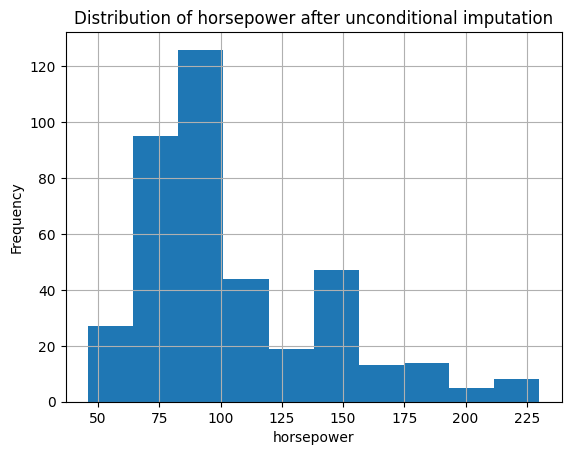

In [55]:
df_copy['horsepower'].hist()
plt.xlabel("horsepower")
plt.ylabel("Frequency")
plt.title("Distribution of horsepower after unconditional imputation")
plt.show()

As seen above, there are no noticeable change in the distribution after imputing missing values. Be careful when imputing missing values as they can radically change the distribution of your data. This mostly depends on the value you are imputing with and on the % of missing values. If there are many missing values, it will largely change the distribution after imputing thereby intriducing false relationships (especially for MCAR).

### Conditional Imputation

Somtimes, it better to do conditional imputation. This is imputing a feature condtioned on another feature. Doing conditional imputation requires domain knowledge and analyzing features to see any relationship.

For this problem, we will demonstrate conditional imputation by imputing `horsepower` base on `cylinder` because we know from domain knowledge that the horsepower is somewhat dependent on the `number` of cylinders in a car.

In [56]:
# imputing with median conditionally (base on the value of another feature)

# making a copy of df to demonstrate unconditional imputation. We will still need df for conditional imputation
df_copy_2 = df.copy()

print(f"Before imputation, horsepower has: {df_copy_2['horsepower'].isnull().sum()}")
print("\n")

# replacing missing values with median value per cylinder
df_copy_2['horsepower'] = df_copy_2['horsepower'].fillna(df_copy_2.groupby('cylinders')['horsepower'].transform('median'))

df_copy_2.isnull().sum() # checking for missing values to confirm their replacement

Before imputation, horsepower has: 6




mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
car company     0
dtype: int64

Checking the distribution after conditionally imputing missing values

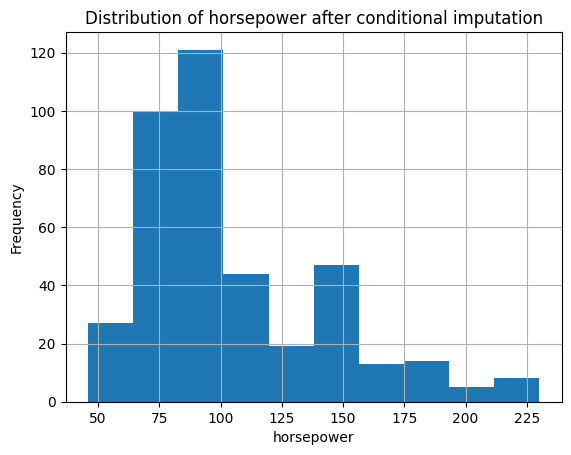

In [57]:
df_copy_2['horsepower'].hist()
plt.xlabel("horsepower")
plt.ylabel("Frequency")
plt.title("Distribution of horsepower after conditional imputation")
plt.show()

Again, as seen above, there are no noticeable change in the distribution after imputing missing values.

## Extra (will not be part of this week's assignment and quiz)

### Bi-variate Analysis Using Barplots

We can use barplot to show aggregated numeric value per discrete value in data.

In [58]:
df.columns # re-checking the number of columns in the data

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name', 'car company'],
      dtype='object')

Defining a function to plot a bar plots for the discrete feature for a given numeric feature.

In [59]:
def plot_numeric_discrete_hist(numeric_var: str, data: pd.DataFrame = df) -> None:
    discrete_vars = ("cylinders", "model year", "origin")
    fig = plt.figure(figsize=(15, 8))
    for i in range(len(discrete_vars)):
        ax = fig.add_subplot(2, len(discrete_vars), i+1)
        mean_per_category = data.groupby(discrete_vars[i])[numeric_var].mean()
        plt.bar(mean_per_category.index, mean_per_category.values)
        plt.xticks(ticks=[], labels=[])
        if i == 0:
            plt.ylabel(f"Mean {numeric_var}")

        ax = fig.add_subplot(2, len(discrete_vars), len(discrete_vars) + i+1)
        median_per_category = data.groupby(discrete_vars[i])[numeric_var].median()
        plt.bar(median_per_category.index, median_per_category.values)
        plt.xticks(rotation=45)
        if i == 0:
            plt.ylabel(f"Median {numeric_var}")

        plt.xlabel(discrete_vars[i])

    plt.show()

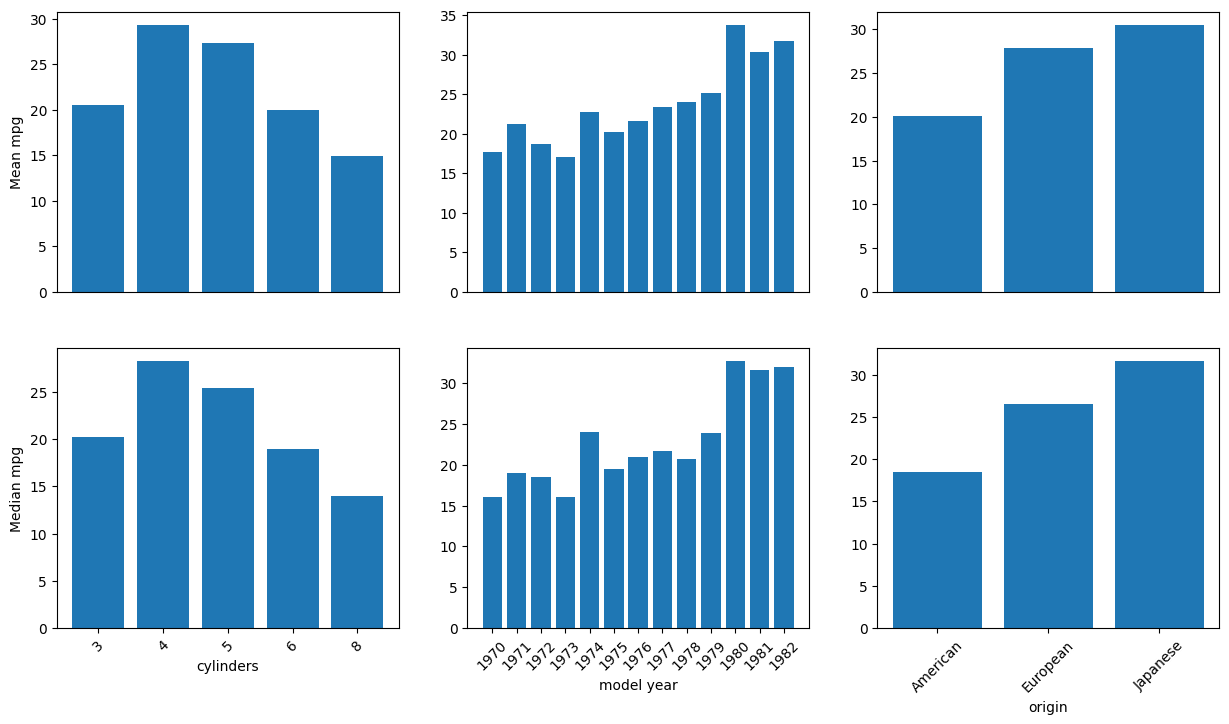

In [60]:
plot_numeric_discrete_hist('mpg')

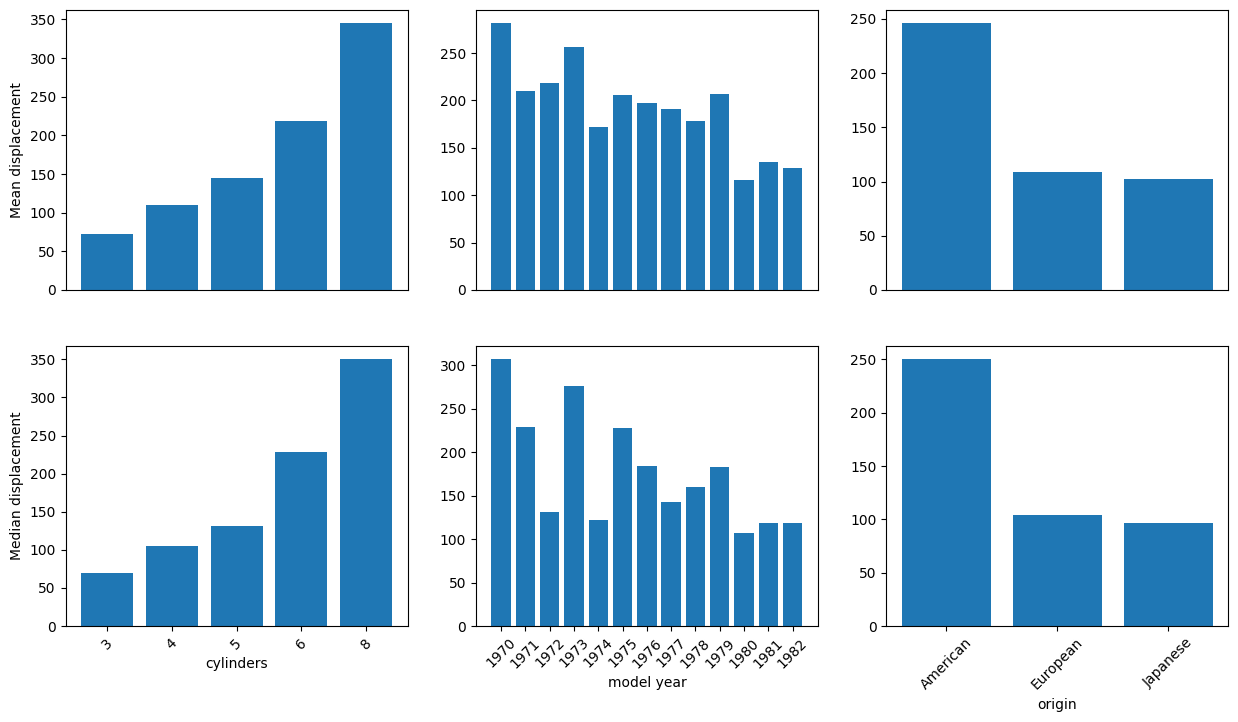

In [61]:
plot_numeric_discrete_hist('displacement')

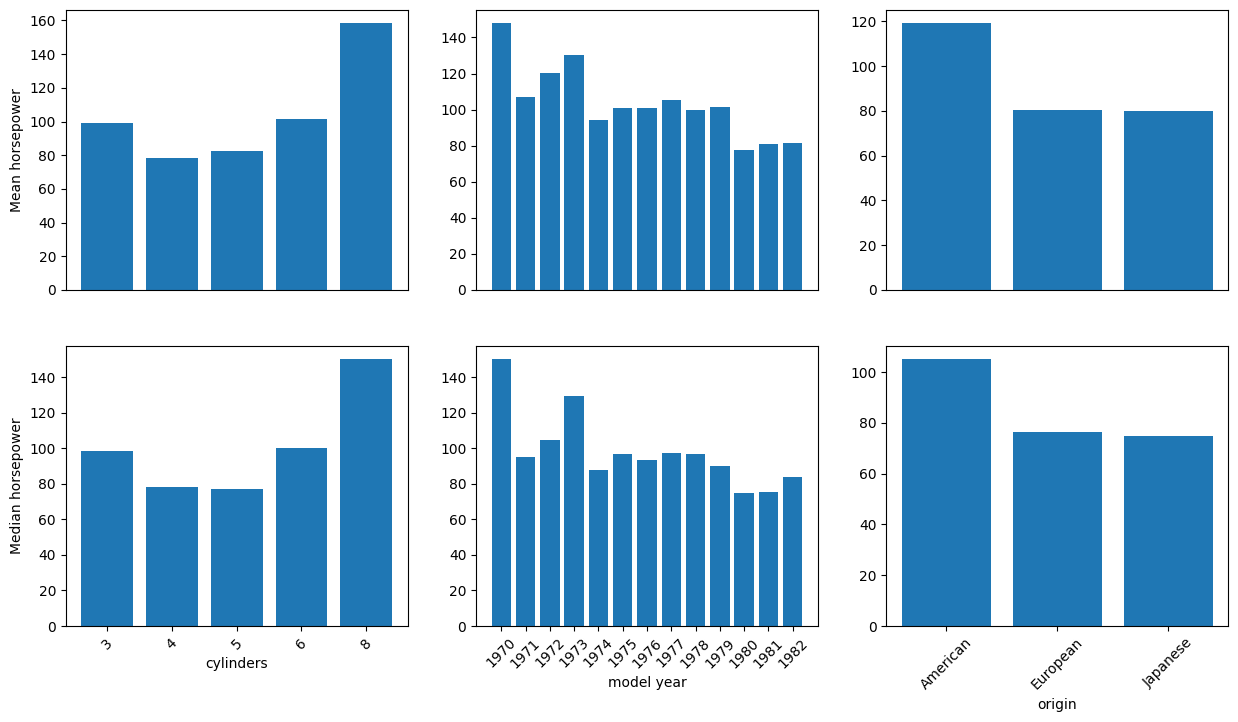

In [62]:
plot_numeric_discrete_hist('horsepower')

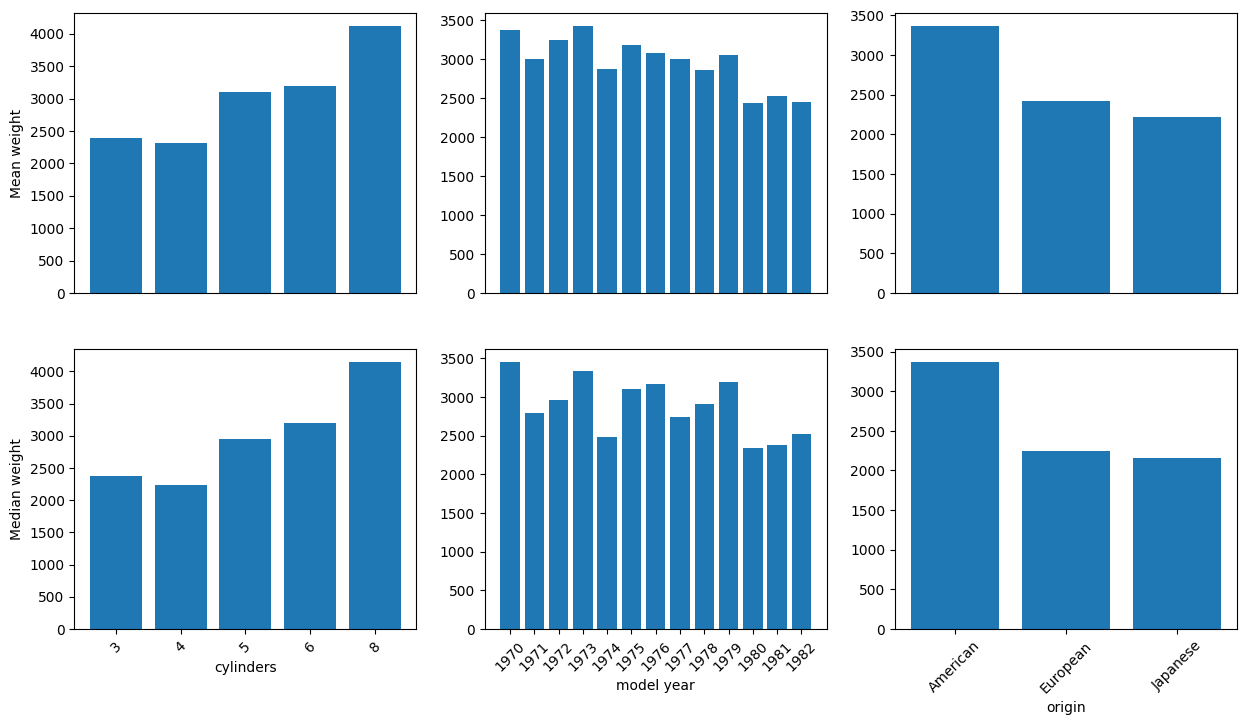

In [63]:
plot_numeric_discrete_hist('weight')

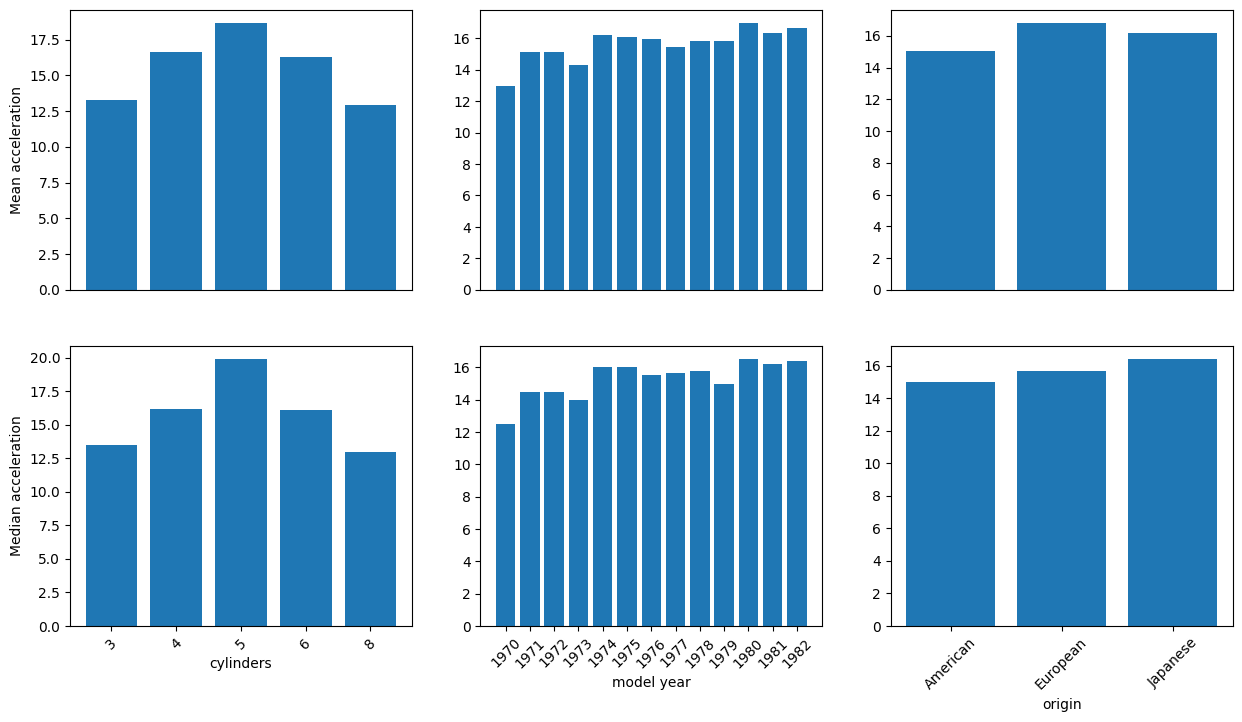

In [64]:
plot_numeric_discrete_hist('acceleration')